Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt





Define WindyGridWorld environment for reinforcement learning with specified dimensions, start and goal positions, and wind effect.

In [12]:
class WindyGridWorld:
    def __init__(self, grid_shape=(7, 10), start=(3, 0), goal=(3, 7), wind=[0, 0, 0, 1, 1, 1, 2, 2, 1, 0]):
        self.grid_shape = grid_shape
        self.start = start
        self.goal = goal
        self.wind = wind

        self.actions = [(0, 1), (0, -1), (-1, 0), (1, 0)]  # Right, Left, Up, Down
        self.num_actions = len(self.actions)

        self.state = start

    def step(self, action):
        # Apply wind effect
        wind_strength = self.wind[self.state[1]]
        next_state = (self.state[0] + self.actions[action][0] - wind_strength,
                      max(0, min(self.grid_shape[1] - 1, self.state[1] + self.actions[action][1])))

        # Check if the next state is within the grid boundaries
        next_state = (max(0, min(self.grid_shape[0] - 1, next_state[0])), next_state[1])

        # Update the current state
        self.state = next_state

        # Check if the agent has reached the goal
        done = (self.state == self.goal)

        return self.state, -1, done

    def reset(self):
        self.state = self.start
        return self.state

Implement Monte Carlo Control algorithm to learn an optimal policy over episodes with exploration-exploitation balance.

In [9]:

class MonteCarloControl:
    def __init__(self, env, episodes=8000, epsilon=0.1, gamma=0.9):
        self.env = env
        self.episodes = episodes
        self.epsilon = epsilon
        self.gamma = gamma

        # Initialize action-value function
        self.Q = np.zeros((env.grid_shape[0], env.grid_shape[1], env.num_actions))
        self.N = np.zeros((env.grid_shape[0], env.grid_shape[1], env.num_actions))  # Visit count for each state-action pair

    def run(self):
        for _ in range(self.episodes):
            episode = []
            state = self.env.reset()
            done = False

            # Generate an episode
            while not done:
                if np.random.rand() < self.epsilon:
                    action = np.random.choice(self.env.num_actions)  # Explore
                else:
                    action = np.argmax(self.Q[state[0], state[1]])  # Exploit

                next_state, reward, done = self.env.step(action)
                episode.append((state, action, reward))
                state = next_state

            # Update action-value function
            G = 0
            for t in range(len(episode) - 1, -1, -1):
                state, action, reward = episode[t]
                G = self.gamma * G + reward
                self.N[state[0], state[1], action] += 1
                alpha = 1 / self.N[state[0], state[1], action]
                self.Q[state[0], state[1], action] += alpha * (G - self.Q[state[0], state[1], action])

        return self.Q

Create WindyGridWorld environment and apply Monte Carlo Control algorithm to obtain Q-values and calculate state values by taking the maximum Q-value at each state.

In [10]:
env = WindyGridWorld()
mc_control = MonteCarloControl(env)
Q_values = mc_control.run()

# Calculate state values (maximum Q-value at each state)
state_values = np.max(Q_values, axis=2)

Plot state values on a heatmap.

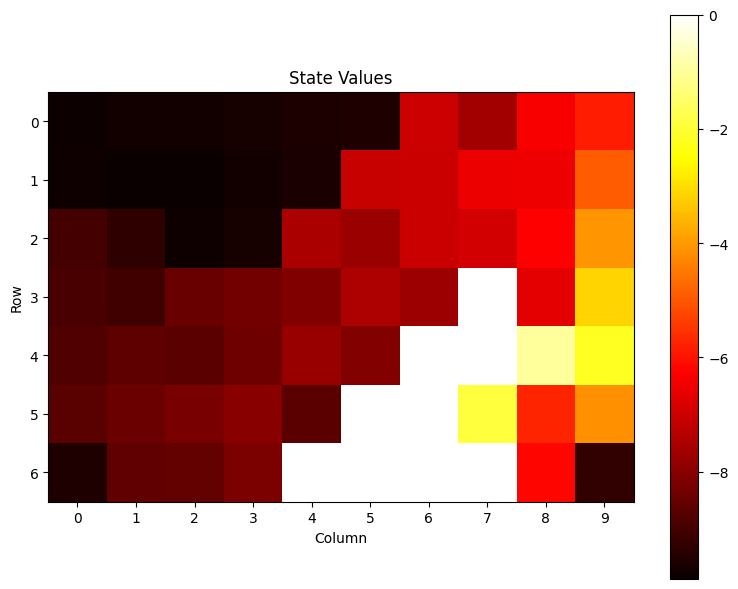

In [11]:
# Plot state values
plt.figure(figsize=(8, 6))
plt.imshow(state_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('State Values')
plt.xlabel('Column')
plt.ylabel('Row')
plt.xticks(range(env.grid_shape[1]))
plt.yticks(range(env.grid_shape[0]))
plt.tight_layout()
plt.show()

Create WindyGridWorld environment and Monte Carlo Control instance and Obtain Q-values and plot them for each state-action pair.

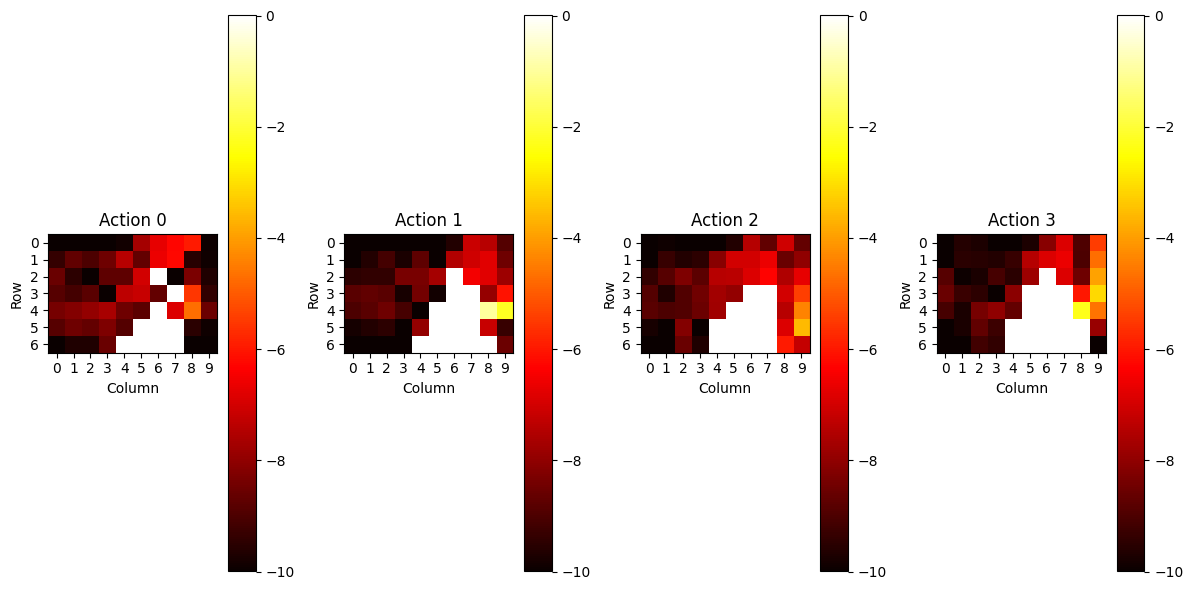

In [13]:

 env = WindyGridWorld()
 mc_control = MonteCarloControl(env)
 Q_values = mc_control.run()

 # Plot Q-values for each state-action pair
 plt.figure(figsize=(12, 6))
 for action in range(env.num_actions):
     plt.subplot(1, env.num_actions, action + 1)
     plt.title(f'Action {action}')
     plt.imshow(Q_values[:,:,action], cmap='hot', interpolation='nearest')
     plt.colorbar()
     plt.xlabel('Column')
     plt.ylabel('Row')
     plt.xticks(range(env.grid_shape[1]))
     plt.yticks(range(env.grid_shape[0]))
 plt.tight_layout()
 plt.show()
















































